Câu 1: Cho ảnh có tên là a.jpg và thực hiện các yêu cầu:

Viết chương trình sử dụng mean filter cho ảnh

Viết chương trình sử dụng filter xác định biên của hình ảnh trên

Viết chương trình đổi màu ảnh từ không gian màu BGR sang một màu ngẫu nhiên (RGB) bằng cách thay đổi các kênh màu một cách ngẫu nhiên, sau đó lưu hình mới vào file a_random_color.jpg

Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng (a_hue.jpg, a_saturation.jpg, a_value.jpg)

In [1]:
import cv2
import numpy as np
import random

# Đọc ảnh
image = cv2.imread('NM-XLA/a.jpg')

# 1. Mean Filter
def mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

mean_filtered_image = mean_filter(image)
cv2.imwrite('img_cau1/a_mean_filtered.jpg', mean_filtered_image)

# 2. Edge Detection using Canny
edges = cv2.Canny(image, 100, 200)
cv2.imwrite('img_cau1/a_edges.jpg', edges)

# 3. Random Color Change
def random_color_change(image):
    channels = cv2.split(image)
    random_channels = [np.random.randint(0, 256, image.shape[:2], dtype=np.uint8) for _ in channels]
    random_image = cv2.merge(random_channels)
    return random_image

random_color_image = random_color_change(image)
cv2.imwrite('img_cau1/a_random_color.jpg', random_color_image)

# 4. Convert to HSV and save Hue, Saturation, Value
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv_image)

cv2.imwrite('img_cau1/a_hue.jpg', hue)
cv2.imwrite('img_cau1/a_saturation.jpg', saturation)
cv2.imwrite('img_cau1/a_value.jpg', value)

# Hiển thị hình ảnh đã xử lý
cv2.imshow('Mean Filter', mean_filtered_image)
cv2.imshow('Edges', edges)
cv2.imshow('Random Color', random_color_image)
cv2.imshow('Hue', hue)
cv2.imshow('Saturation', saturation)
cv2.imshow('Value', value)

cv2.waitKey(0)
cv2.destroyAllWindows()

Câu 2: Viết một chương trình Python sử dụng OpenCV để tạo menu động cho phép người dùng chọn các phương pháp biến đổi ảnh từ một danh sách mở rộng, áp dụng cho nhiều ảnh cùng lúc, và thực hiện các phân tích bổ sung. Các yêu cầu cụ thể:

1. Tạo một menu động cho phép người dùng chọn các phương pháp biến đổi ảnh sau:
- Image inverse transformation
- Gamma-Correction (với giá trị gamma ngẫu nhiên từ 0.5 đến 2.0) 
- Log Transformation (với hệ số nhân ngẫu nhiên từ 1.0 đến 5.0) 
- Histogram equalization
- Contrast Stretching (tùy chỉnh với giá trị min và max ngẫu nhiên từ 0 đến 255)
- Adaptive Histogram Equalization (sử dụng CLAHE với ô lưới 8x8) 

2. Chương trình phải xử lý đồng thời ba ảnh đầu vào có tên image1.jpg, image2.jpg, và
image3.jpg

3. Khi người dùng nhấn các phím sau, chương trình sẽ thực hiện biến đổi tương ứng
trên cả ba ảnh 
- Phím I: Image inverse transformation
- Phím G: Gamma-Correction
- Phím L: Log Transformation
- Phím H: Histogram equalization
- Phím C: Contrast Stretching
- Phím A: Adaptive Histogram Equalization

4. Đối với mỗi biến đổi, lưu kết quả của từng ảnh vào các file riêng biệt với tên định
dạng output_[phương pháp]_[số ảnh].jpg (ví dụ: output_inverse_1.jpg,
output_gamma_2.jpg)

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Đọc các ảnh
images = [cv2.imread('NM-XLA/image1.jpg'), cv2.imread('NM-XLA/image2.jpg'), cv2.imread('NM-XLA/image3.jpg')]

def image_inverse(image):
    return 255 - image

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def log_transformation(image, c):
    return c * np.log1p(image).astype(np.uint8)

def histogram_equalization(image):
    if len(image.shape) == 3:  # Nếu là ảnh màu
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
        return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    else:  # Nếu là ảnh xám
        return cv2.equalizeHist(image)

def contrast_stretching(image, min_val, max_val):
    return cv2.normalize(image, None, alpha=min_val, beta=max_val, norm_type=cv2.NORM_MINMAX)

def adaptive_histogram_equalization(image):
    if len(image.shape) == 3:  # Nếu là ảnh màu
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        return cv2.cvtColor(limg, cv2.COLOR_Lab2BGR)
    else:  # Nếu là ảnh xám
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

# Hàm lưu kết quả
def save_image(image, method, index):
    filename = f'img_cau2/output_{method}_{index}.jpg'
    cv2.imwrite(filename, image)

# Hàm xử lý ảnh
def process_images(method):
    for i, image in enumerate(images):
        if method == 'I':
            result = image_inverse(image)
            save_image(result, 'inverse', i + 1)
        elif method == 'G':
            gamma = random.uniform(0.5, 2.0)
            result = gamma_correction(image, gamma)
            save_image(result, 'gamma', i + 1)
        elif method == 'L':
            c = random.uniform(1.0, 5.0)
            result = log_transformation(image, c)
            save_image(result, 'log', i + 1)
        elif method == 'H':
            result = histogram_equalization(image)
            save_image(result, 'histogram', i + 1)
        elif method == 'C':
            min_val = random.randint(0, 255)
            max_val = random.randint(min_val, 255)
            result = contrast_stretching(image, min_val, max_val)
            save_image(result, 'contrast', i + 1)
        elif method == 'A':
            result = adaptive_histogram_equalization(image)
            save_image(result, 'adaptive', i + 1)
        else:
            print("Phương pháp không hợp lệ!")

# Menu điều khiển
while True:
    print("Nhấn phím để chọn phương pháp biến đổi ảnh:")
    print("I: Image inverse transformation")
    print("G: Gamma-Correction")
    print("L: Log Transformation")
    print("H: Histogram equalization")
    print("C: Contrast Stretching")
    print("A: Adaptive Histogram Equalization")
    print("Q: Thoát chương trình")
    
    key = input("Nhập phím: ").strip().upper()

    if key == 'Q':
        break
    process_images(key)
    print("Đã hoàn thành biến đổi với phương pháp:", key)

Câu 3: Viết một chương trình Python sử dụng OpenCV để xử lý ba ảnh:
colorful-ripe-tropical-fruits.jpg, quang-ninh.jpg, và pagoda.jpg với các phương pháp
biến đổi và tiền xử lý nâng cao.
- Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều
rộng và chiều cao. (0.5 Điểm)
- Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang. (0.5 Điểm)
- Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel
7x7 để làm mịn

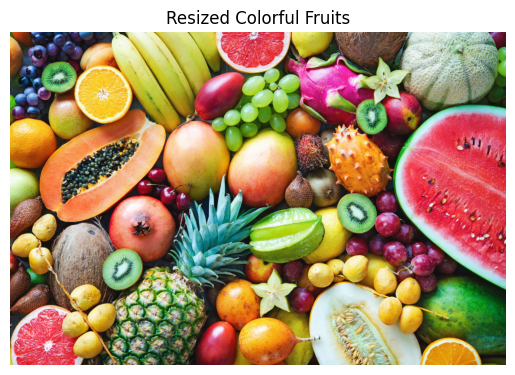

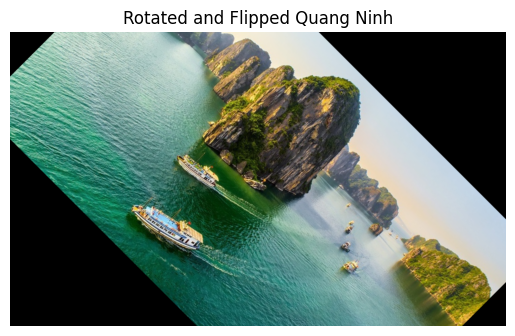

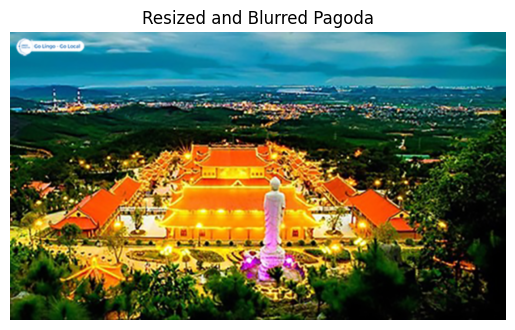

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Tăng kích thước ảnh colorful-ripe-tropical-fruits.jpg thêm 30 pixel ở cả chiều rộng và chiều cao
colorful_image = cv2.imread('NM-XLA/colorful-ripe-tropical-fruits.jpg')
colorful_image_resized = cv2.resize(colorful_image, (colorful_image.shape[1] + 30, colorful_image.shape[0] + 30))
display_image(colorful_image_resized, 'Resized Colorful Fruits')

# 2. Xoay ảnh quang-ninh.jpg 45 độ theo chiều kim đồng hồ và lật ngang
quang_ninh_image = cv2.imread('NM-XLA/quang_ninh.jpg')
(h, w) = quang_ninh_image.shape[:2]
M = cv2.getRotationMatrix2D((w / 2, h / 2), 45, 1.0)  # Rotate 45 degrees
quang_ninh_rotated = cv2.warpAffine(quang_ninh_image, M, (w, h))
quang_ninh_flipped = cv2.flip(quang_ninh_rotated, 1)  # Flip horizontally
display_image(quang_ninh_flipped, 'Rotated and Flipped Quang Ninh')

# 3. Tăng kích thước ảnh pagoda.jpg lên 5 lần và áp dụng Gaussian blur với kernel 7x7
pagoda_image = cv2.imread('NM-XLA/pagoda.jpg')
pagoda_image_resized = cv2.resize(pagoda_image, (pagoda_image.shape[1] * 5, pagoda_image.shape[0] * 5))
pagoda_image_blurred = cv2.GaussianBlur(pagoda_image_resized, (7, 7), 0)
display_image(pagoda_image_blurred, 'Resized and Blurred Pagoda')